In [1]:
import pandas as pd
print(pd.__version__)
print(pd.__name__)

import numpy as np #импорт библиотеки для мат. вычислений

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')


print(sns.__version__)

import plotly
import plotly.express as px
print(plotly.__version__)

import plotly.graph_objs as go
from plotly.subplots import make_subplots

1.4.3
pandas
0.11.2
5.10.0


##Task 8

In [2]:
diabet_data = pd.read_csv('data/diabetes_data.csv')
display(diabet_data.head())
display(diabet_data.tail())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female
777,5,147,78,0,0,33.7,0.218,65,0,Female


 Задание 8.1

Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [3]:
dupl_columns = list(diabet_data.columns)
mask = diabet_data.duplicated(subset=dupl_columns)
diabet_duplicates = diabet_data[mask]
print(f'Число оригинала: {diabet_data.shape[0]}')
print(f'Число найденных дубликатов: {diabet_duplicates.shape[0]}')

diabet_dedupped = diabet_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {diabet_dedupped.shape[0]}')

Число оригинала: 778
Число найденных дубликатов: 10
Результирующее число записей: 768


 Задание 8.2

Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [4]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabet_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabet_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabet_data[col].nunique() / diabet_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
diabet_data = diabet_data.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {diabet_data.shape[1]}')

Gender: 100.0% одинаковых значений
Результирующее число признаков: 9


 Задание 8.3

Попробуйте найти пропуски в данных с помощью метода isnull(). 

In [5]:
diabet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.8 KB


In [6]:
null_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in null_col:
    diabet_data[col] = diabet_data[col].apply(lambda x: np.nan if x == 0 else x)
    
display(diabet_data.info())
display(diabet_data.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   773 non-null    float64
 2   BloodPressure             742 non-null    float64
 3   SkinThickness             546 non-null    float64
 4   Insulin                   398 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.8 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,0
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,0


In [7]:
cols_null_percent = diabet_data.isnull().mean()
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
display(cols_with_null)

Insulin          0.488432
SkinThickness    0.298201
BloodPressure    0.046272
BMI              0.014139
Glucose          0.006427
dtype: float64

 Задание 8.4
1/1 point (graded)

Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [8]:
thresh = diabet_data.shape[0]*0.7
diabet_data = diabet_data.dropna(how='any', thresh=thresh, axis=1)
#thresh2 = diabet_data.shape[1] -2 
#df = diabet_data.dropna(how='any', thresh=thresh2, axis=0)
display(diabet_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   773 non-null    float64
 2   BloodPressure             742 non-null    float64
 3   SkinThickness             546 non-null    float64
 4   BMI                       767 non-null    float64
 5   DiabetesPedigreeFunction  778 non-null    float64
 6   Age                       778 non-null    int64  
 7   Outcome                   778 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 48.8 KB


None

 Задание 8.5
1 point possible (graded)

Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [9]:
thresh2 = diabet_data.shape[1]-2 
diabet_data1 = diabet_data.dropna(how='any', thresh=thresh2, axis=0)


In [10]:
display(diabet_data1.shape[0])

771

 Задание 8.6

В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых. 

In [11]:
print(diabet_data1['SkinThickness'].mean().round(2))

29.15


In [13]:
#null_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
values = {
    'Glucose': diabet_data['Glucose'].mean().round(1),
    'BloodPressure': diabet_data['BloodPressure'].mean().round(1),
    'SkinThickness': diabet_data['SkinThickness'].mean().round(1),
    'BMI': diabet_data['BMI'].mean().round(1)
}

diabet_data_fill = diabet_data1.fillna(value=values) 
display(diabet_data_fill.head(5))


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.2,30.8,0.158,21,0
3,8,107.0,80.0,29.2,24.6,0.856,34,0
4,7,136.0,90.0,29.2,29.9,0.210,50,0


In [25]:
def outliers_iqr_mod_log(data, column, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[column])
    else:
        x = data[column]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod_log(diabet_data_fill, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 684


Число выбросов по методу z-отклонения: 4
Результирующее число записей: 767


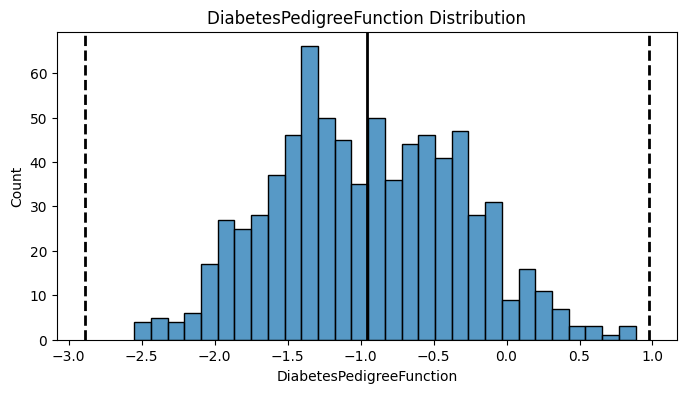

In [27]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(diabet_data_fill, 'SkinThickness')
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(diabet_data_fill['DiabetesPedigreeFunction'])
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('DiabetesPedigreeFunction Distribution');
#print(outliers['sub_area'].unique())

 Задание 8.9
На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

In [26]:
outliers, cleaned = outliers_iqr_mod_log(diabet_data_fill, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

outliers, cleaned = outliers_iqr_mod_log(diabet_data_fill, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 742
Число выбросов по методу Тьюки: 0
Результирующее число записей: 771




Имеются две базы данных (два листа Excel-файла): база с ценами конкурентов (Data_Parsing) и внутренняя база компании (Data_Company).

В базе парсинга есть два id, однозначно определяющие товар: producer_id и producer_color.

В базе компании есть два аналогичных поля: item_id и color_id.

Нам известно, что коды в двух базах отличаются наличием набора служебных символов. В базе парсинга встречаются следующие символы: _, -, ~, \\, /.

Необходимо:

    Считать данные из Excel в DataFrame (Data_Parsing) и (Data_Company).
    Подтянуть к базе парсинга данные из базы компании (item_id, color_id, current_price) и сформировать столбец разницы цен в % (цена конкурента к нашей цене).
    Определить сильные отклонения от среднего в разности цен в пределах бренда-категории (то есть убрать случайные выбросы, сильно искажающие сравнение). Критерий — по вкусу, написать комментарий в коде.
    Записать новый файл Excel с базой парсинга, приклееными к ней столбцами из пункта 2 и с учётом пункта 3 (можно добавить столбец outlier и проставить Yes для выбросов).
